In [1]:
# Install packages
!pip install flaml
!pip install bokeh
#!pip install catboost
#!pip install django

     |████████████████████████████████| 154 kB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 53.6 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [2]:
# Import packages
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from flaml import AutoML 
from flaml.data import get_output_from_log
import matplotlib.pyplot as plt
#from bokeh import push_notebook, show, output_notebook
#from bokeh.io import output_notebook, show
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.io import output_file, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.models import Title, HoverTool
from bokeh.palettes import Spectral4
#from django.conf import settings

In [3]:
# Load in and prepare data
dataset = load_iris()
x = dataset.data
y = dataset.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2, random_state = 100)

In [4]:
# Log for LGBM
automl_clf = AutoML()
automl_clf.fit(x_train, y_train, 
               task="classification",
               log_type = 'best',
               estimator_list = ['lgbm'],
               log_file_name = 'iter_lbgm.log') 

[flaml.automl: 03-29 18:56:04] {2068} INFO - task = classification
[flaml.automl: 03-29 18:56:04] {2070} INFO - Data split method: stratified
[flaml.automl: 03-29 18:56:04] {2074} INFO - Evaluation method: cv
[flaml.automl: 03-29 18:56:04] {2155} INFO - Minimizing error metric: log_loss
[flaml.automl: 03-29 18:56:04] {2248} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 03-29 18:56:04] {2501} INFO - iteration 0, current learner lgbm
[flaml.automl: 03-29 18:56:04] {2617} INFO - Estimated sufficient time budget=673s. Estimated necessary time budget=1s.
[flaml.automl: 03-29 18:56:04] {2669} INFO -  at 0.1s,	estimator lgbm's best error=0.6749,	best estimator lgbm's best error=0.6749
[flaml.automl: 03-29 18:56:04] {2501} INFO - iteration 1, current learner lgbm
[flaml.automl: 03-29 18:56:04] {2669} INFO -  at 0.1s,	estimator lgbm's best error=0.6749,	best estimator lgbm's best error=0.6749
[flaml.automl: 03-29 18:56:04] {2501} INFO - iteration 2, current learner lgbm
[fla

In [5]:
# Log for XGBoost
automl_clf = AutoML()
automl_clf.fit(x_train, y_train, 
               task="classification",
               log_type = 'best',
               estimator_list = ['xgboost'],
               log_file_name = 'iter_xgboost.log') 

[flaml.automl: 03-29 18:57:09] {2068} INFO - task = classification
[flaml.automl: 03-29 18:57:09] {2070} INFO - Data split method: stratified
[flaml.automl: 03-29 18:57:09] {2074} INFO - Evaluation method: cv
[flaml.automl: 03-29 18:57:09] {2155} INFO - Minimizing error metric: log_loss
[flaml.automl: 03-29 18:57:09] {2248} INFO - List of ML learners in AutoML Run: ['xgboost']
[flaml.automl: 03-29 18:57:09] {2501} INFO - iteration 0, current learner xgboost
[flaml.automl: 03-29 18:57:09] {2617} INFO - Estimated sufficient time budget=1496s. Estimated necessary time budget=1s.
[flaml.automl: 03-29 18:57:09] {2669} INFO -  at 0.2s,	estimator xgboost's best error=0.7186,	best estimator xgboost's best error=0.7186
[flaml.automl: 03-29 18:57:09] {2501} INFO - iteration 1, current learner xgboost
[flaml.automl: 03-29 18:57:09] {2669} INFO -  at 0.2s,	estimator xgboost's best error=0.7186,	best estimator xgboost's best error=0.7186
[flaml.automl: 03-29 18:57:09] {2501} INFO - iteration 2, cur

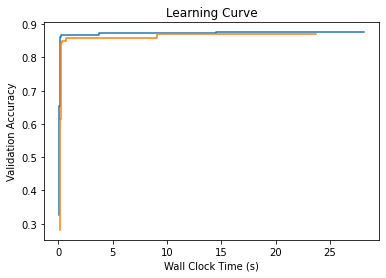

In [6]:
# Create plot from log file

time_history_lgbm, best_valid_loss_history_lgbm, valid_loss_history_lgbm, config_history_lgbm, metric_history_lgbm = \
    get_output_from_log(filename="iter_lbgm.log", time_budget=60)

time_history_xgb, best_valid_loss_history_xgb, valid_loss_history_xgb, config_history_xgb, metric_history_xgb = \
    get_output_from_log(filename="iter_xgboost.log", time_budget=60)


plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history_lgbm, 1 - np.array(best_valid_loss_history_lgbm))
plt.step(time_history_xgb, 1-np.array(best_valid_loss_history_xgb))
plt.show()

In [7]:
# Must include this to generate output
output_notebook()

In [8]:
p1 = figure(plot_width=250, plot_height=250)
r1 = p1.circle([1,2,3], [4,5,6], size=20)
p2 = figure(plot_width=250, plot_height=250)
r2 = p2.circle([1,2,3], [4,5,6], size=20)

# Get a handle to update the shown cell with
t = show(row(p1,p2), notebook_handle=True)

Dot Plot

In [14]:
time_history_lgbm, best_valid_loss_history_lgbm, valid_loss_history_lgbm, config_history_lgbm, metric_history_lgbm = \
    get_output_from_log(filename="iter_lbgm.log", time_budget=60)

time_history_xgb, best_valid_loss_history_xgb, valid_loss_history_xgb, config_history_xgb, metric_history_xgb = \
    get_output_from_log(filename="iter_xgboost.log", time_budget=60)

x_values1 = time_history_lgbm
y_values1 = 1 - np.array(best_valid_loss_history_lgbm)

x_values2 = time_history_xgb
y_values2 = 1-np.array(best_valid_loss_history_xgb)

# General plot
p1 = figure(title='LGBM', plot_width=250, plot_height=250)
p2 = figure(title='XGBoost', plot_width=250, plot_height=250)

# Add axis titles
p1.add_layout(Title(text="Time", align="center"), "below")
p1.add_layout(Title(text="Best Validation Loss", align="center"), "left")
p2.add_layout(Title(text="Time", align="center"), "below")
p2.add_layout(Title(text="Best Validation Loss", align="center"), "left")

# Creates dots
r1 = p1.circle(x=x_values1, y=y_values1, size=3)
r2 = p2.circle(x=x_values2, y=y_values2, size=3)

# Adds hovertool
p1.add_tools(HoverTool())
p2.add_tools(HoverTool())

# Show plot
t = show(row(p1,p2), notebook_handle=True)

Create line chart

In [15]:
time_history_lgbm, best_valid_loss_history_lgbm, valid_loss_history_lgbm, config_history_lgbm, metric_history_lgbm = \
    get_output_from_log(filename="iter_lbgm.log", time_budget=60)

time_history_xgb, best_valid_loss_history_xgb, valid_loss_history_xgb, config_history_xgb, metric_history_xgb = \
    get_output_from_log(filename="iter_xgboost.log", time_budget=60)

x_values1 = time_history_lgbm
y_values1 = 1 - np.array(best_valid_loss_history_lgbm)

x_values2 = time_history_xgb
y_values2 = 1-np.array(best_valid_loss_history_xgb)

# General plot
p1 = figure(title='LGBM', plot_width=250, plot_height=250)
p2 = figure(title='XGBoost', plot_width=250, plot_height=250)

# Add axis titles
p1.add_layout(Title(text="Time", align="center"), "below")
p1.add_layout(Title(text="Best Validation Loss", align="center"), "left")
p2.add_layout(Title(text="Time", align="center"), "below")
p2.add_layout(Title(text="Best Validation Loss", align="center"), "left")

# Creates lines
p1.line(x=x_values1, y=y_values1)
p2.line(x=x_values2, y=y_values2)

# Adds hovertool
p1.add_tools(HoverTool())
p2.add_tools(HoverTool())

# Show plot
t = show(row(p1,p2), notebook_handle=True)


p1.legend.location = "top_left"
p1.legend.click_policy="hide"
for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    p.line(df['date'], df['close'], line_width=2, color=color, alpha=0.8, legend_label=name)

# Creates a dark theme
#curdoc().theme = 'dark_minimal'

/usr/local/lib/python3.7/dist-packages/bokeh/models/plots.py:766: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
/usr/local/lib/python3.7/dist-packages/bokeh/models/plots.py:766: UserWarning: 
You are attempting to set `plot.legend.click_policy` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


Hiding Glyphs code.  Click on legend and it will remove/add line

In [10]:
import pandas as pd

from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_file, show

p = figure(width=800, height=250, x_axis_type="datetime")
p.title.text = 'Click on legend entries to hide the corresponding lines'

for data, name, color in zip([AAPL, IBM, MSFT, GOOG], ["AAPL", "IBM", "MSFT", "GOOG"], Spectral4):
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    p.line(df['date'], df['close'], line_width=2, color=color, alpha=0.8, legend_label=name)

p.legend.location = "top_left"
p.legend.click_policy="hide"

output_file("interactive_legend.html", title="interactive_legend.py example")

show(p)

RuntimeError: ignored

In [11]:
from flaml.data import get_output_from_log
  
time_history_lgbm, best_valid_loss_history_lgbm, valid_loss_history_lgbm, config_history_lgbm, metric_history_lgbm = \
    get_output_from_log(filename="iter_lbgm.log", time_budget=60) #lgbm output

time_history_xgb, best_valid_loss_history_xgb, valid_loss_history_xgb, config_history_xgb, metric_history_xgb = \
    get_output_from_log(filename="iter_xgboost.log", time_budget=60) #xgb output

time_history_rf, best_valid_loss_history_rf, valid_loss_history_rf, config_history_rf, metric_history_rf = \
    get_output_from_log(filename="iter_rf.log", time_budget=60) #rf output     

time_history_et, best_valid_loss_history_et, valid_loss_history_et, config_history_et, metric_history_et = \
    get_output_from_log(filename="iter_et.log", time_budget=60)  #extra tree output     

time_history_lrl1, best_valid_loss_history_lrl1, valid_loss_history_lrl1, config_history_lrl1, metric_history_lrl1 = \
    get_output_from_log(filename="iter_lrl1.log", time_budget=60)  #Logistic Regression with L1 regularization output 
 
time_history_lrl2, best_valid_loss_history_lrl2, valid_loss_history_lrl2, config_history_lrl2, metric_history_lrl2 = \
    get_output_from_log(filename="iter_lrl2.log", time_budget=60)  #Logistic Regression with L2 regularization output 

time_history_cat, best_valid_loss_history_cat, valid_loss_history_cat, config_history_cat, metric_history_cat = \
    get_output_from_log(filename="iter_catboost.log", time_budget=60)  #catboost output 

time_history_kn, best_valid_loss_history_kn, valid_loss_history_kn, config_history_kn, metric_history_kn = \
    get_output_from_log(filename="iter_kn.log", time_budget=60)  #kneighbor output 
'''
time_history_pr, best_valid_loss_history_pr, valid_loss_history_pr, config_history_pr, metric_history_pr = \
      get_output_from_log(filename="iter_prophet.log", time_budget=60)  #prophet output 
  
time_history_ar, best_valid_loss_history_ar, valid_loss_history_ar, config_history_ar, metric_history_ar = \
      get_output_from_log(filename="iter_arima.log", time_budget=60)  #arima output 
  
time_history_sm, best_valid_loss_history_sm, valid_loss_history_sm, config_history_sm, metric_history_sm = \
      get_output_from_log(filename="iter_sarimax.log", time_budget=60)  #sarimax output
  
time_history_tr, best_valid_loss_history_tr, valid_loss_history_tr, config_history_tr, metric_history_tr = \
      get_output_from_log(filename="iter_transformer.log", time_budget=60)  #transformer output
'''
# Visualization
import matplotlib.pyplot as plt
import numpy as np

data = [1-min(best_valid_loss_history_lgbm), 1-min(best_valid_loss_history_xgb), 1-min(best_valid_loss_history_rf), 1-min(best_valid_loss_history_et), 1-min(best_valid_loss_history_lrl1), 1-min(best_valid_loss_history_lrl2), 1-min(best_valid_loss_history_cat), 1-min(best_valid_loss_history_kn)]
plt.bar(["lgbm","xgb","rf","et","lr1","lr2","cat","kn"], data, color = ("blue","red","green", "yellow","black","cyan","pink", "grey"))
plt.ylim(min(data)-.01, max(data)+.01)
plt.title("Accuracy Barchart")
plt.show()

FileNotFoundError: ignored